# MAT281 - Laboratorio N°03



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.





2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [3]:
print(df.dtypes)
print('Hay algún dato vacío?')
print('year:',df['year'].isnull().values.any())
print('desp:',df['desplazamiento'].isnull().values.any())
print('cilindros:',df['cilindros'].isnull().values.any())
print('co2:',df['co2'].isnull().values.any())
print('cml:',df['consumo_litros_milla'].isnull().values.any())


year                      int64
desplazamiento          float64
cilindros               float64
co2                     float64
clase_tipo               object
traccion_tipo            object
transmision_tipo         object
combustible_tipo         object
tamano_motor_tipo        object
consumo_tipo             object
co2_tipo                 object
consumo_litros_milla    float64
dtype: object
Hay algún dato vacío?
year: False
desp: True
cilindros: True
co2: False
cml: False


In [4]:
df_1 = df.select_dtypes(exclude=['object'])
df_1

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588
...,...,...,...,...,...
36786,2015,1.0,3.0,244.000000,0.105150
36787,2016,0.9,3.0,246.000000,0.108155
36788,2016,0.9,3.0,255.000000,0.111336
36789,2017,0.9,3.0,248.000000,0.108155


In [5]:

mask_desp=df_1['desplazamiento'].isnull()==True
mask_cil=df_1['cilindros'].isnull()==True

df_1.loc[mask_desp]=df_1['desplazamiento'].mean()
df_1.loc[mask_cil]=df_1['cilindros'].mean()

df_1

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984.0,2.5,4.0,522.764706,0.222671
1,1984.0,4.2,6.0,683.615385,0.291185
2,1985.0,2.5,4.0,555.437500,0.236588
3,1985.0,4.2,6.0,683.615385,0.291185
4,1987.0,3.8,6.0,555.437500,0.236588
...,...,...,...,...,...
36786,2015.0,1.0,3.0,244.000000,0.105150
36787,2016.0,0.9,3.0,246.000000,0.108155
36788,2016.0,0.9,3.0,255.000000,0.111336
36789,2017.0,0.9,3.0,248.000000,0.108155


In [6]:
scaler = MinMaxScaler()

columns=['desplazamiento','cilindros','co2','consumo_litros_milla']
df_1[columns] = scaler.fit_transform(df_1[columns])

df_1.head()

<ipython-input-6-f3d588752e9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[columns] = scaler.fit_transform(df_1[columns])
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984.0,0.243590,0.142857,0.409090,0.027707
1,1984.0,0.461538,0.285714,0.536363,0.039767
2,1985.0,0.243590,0.142857,0.434942,0.030157
3,1985.0,0.461538,0.285714,0.536363,0.039767
4,1987.0,0.410256,0.285714,0.434942,0.030157


In [7]:
df_2=df.select_dtypes(exclude=['float64','int64'])
df_d=pd.get_dummies(df_2)
df_d

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


Se separan las categorías (columnas) de acuerdo con sus tipos (cualidades) para indicar con un valor numérico si corresponde a cierto tipo o no (1-0 respectivamente)

In [8]:
df_procesado=pd.concat([df_1, df_d], axis=1, sort=False)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,1984.0,0.243590,0.142857,0.409090,0.027707,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1984.0,0.461538,0.285714,0.536363,0.039767,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1985.0,0.243590,0.142857,0.434942,0.030157,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1985.0,0.461538,0.285714,0.536363,0.039767,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1987.0,0.410256,0.285714,0.434942,0.030157,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas
    
    

In [9]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)
centroids = kmeans.cluster_centers_ 
clusters = kmeans.labels_ 

In [10]:
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids)
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]

In [11]:
mask1=df_procesado['cluster']==1
mask2=df_procesado['cluster']==2
mask3=df_procesado['cluster']==3
mask4=df_procesado['cluster']==4
mask5=df_procesado['cluster']==5
mask6=df_procesado['cluster']==6
mask7=df_procesado['cluster']==7
mask8=df_procesado['cluster']==8


promedio1=df_procesado[mask1].mean()
promedio2=df_procesado[mask2].mean()
promedio3=df_procesado[mask3].mean()
promedio4=df_procesado[mask4].mean()
promedio5=df_procesado[mask5].mean()
promedio6=df_procesado[mask6].mean()
promedio7=df_procesado[mask7].mean()
promedio8=df_procesado[mask8].mean()


moda1=df_procesado[mask1].mode()
moda2=df_procesado[mask2].mode()
moda3=df_procesado[mask3].mode()
moda4=df_procesado[mask4].mode()
moda5=df_procesado[mask5].mode()
moda6=df_procesado[mask6].mode()
moda7=df_procesado[mask7].mode()
moda8=df_procesado[mask8].mode()


df_medidas=pd.DataFrame({'Clusters' : ['1','2','3','4','5','6','7','8']})
df_medidas['Promedio desplazamiento'] = [promedio1['desplazamiento'],promedio2['desplazamiento'],promedio3['desplazamiento'],promedio4['desplazamiento'],promedio5['desplazamiento'],promedio6['desplazamiento'],promedio7['desplazamiento'],promedio8['desplazamiento']]
df_medidas['Moda desplazamiento']= [moda1['desplazamiento'],moda2['desplazamiento'],moda3['desplazamiento'],moda4['desplazamiento'],moda5['desplazamiento'],moda6['desplazamiento'],moda7['desplazamiento'],moda8['desplazamiento']]

df_medidas['Promedio cilindros'] = [promedio1['cilindros'],promedio2['cilindros'],promedio3['cilindros'],promedio4['cilindros'],promedio5['cilindros'],promedio6['cilindros'],promedio7['cilindros'],promedio8['cilindros']]
df_medidas['Moda cilindros']= [moda1['cilindros'],moda2['cilindros'],moda3['cilindros'],moda4['cilindros'],moda5['cilindros'],moda6['cilindros'],moda7['cilindros'],moda8['cilindros']]


df_medidas['Promedio co2'] = [promedio1['co2'],promedio2['co2'],promedio3['co2'],promedio4['co2'],promedio5['co2'],promedio6['co2'],promedio7['co2'],promedio8['co2']]
df_medidas['Moda co2']= [moda1['co2'],moda2['co2'],moda3['co2'],moda4['co2'],moda5['co2'],moda6['co2'],moda7['co2'],moda8['co2']]

df_medidas['Promedio consumo_litros_milla'] = [promedio1['consumo_litros_milla'],promedio2['consumo_litros_milla'],promedio3['consumo_litros_milla'],promedio4['consumo_litros_milla'],promedio5['consumo_litros_milla'],promedio6['consumo_litros_milla'],promedio7['consumo_litros_milla'],promedio8['consumo_litros_milla']]
df_medidas['Moda consumo_litros_milla']= [moda1['consumo_litros_milla'],moda2['consumo_litros_milla'],moda3['consumo_litros_milla'],moda4['consumo_litros_milla'],moda5['consumo_litros_milla'],moda6['consumo_litros_milla'],moda7['consumo_litros_milla'],moda8['consumo_litros_milla']]

df_medidas
#print(promedio1)

,Clusters,Promedio desplazamiento,Moda desplazamiento,Promedio cilindros,Moda cilindros,Promedio co2,Moda co2,Promedio consumo_litros_milla,Moda consumo_litros_milla
0,1,0.659790,"0 0.65979 Name: desplazamiento, dtype: float64",0.267597,"0 0.267597 Name: cilindros, dtype: float64",0.000000,"0 0.0 Name: co2, dtype: float64",1.000000,"0 1.0 Name: consumo_litros_milla, dtype: fl..."
1,2,0.381506,"0 0.371795 Name: desplazamiento, dtype: flo...",0.291057,"0 0.285714 Name: cilindros, dtype: float64",0.364400,"0 0.330302 Name: co2, dtype: float64",0.023460,"0 0.020241 Name: consumo_litros_milla, dtyp..."
2,3,0.336339,"0 0.24359 Name: desplazamiento, dtype: float64",0.250937,"0 0.142857 Name: cilindros, dtype: float64",0.390344,"0 0.38611 Name: co2, dtype: float64",0.025766,"0 0.025529 Name: consumo_litros_milla, dtyp..."
3,4,0.359461,"0 0.307692 Name: desplazamiento, dtype: flo...",0.283193,"0 0.285714 Name: cilindros, dtype: float64",0.383149,"0 0.330302 Name: co2, dtype: float64",0.025263,"0 0.020241 Name: consumo_litros_milla, dtyp..."
4,5,0.336925,"0 0.179487 Name: desplazamiento, dtype: flo...",0.264386,"0 0.142857 Name: cilindros, dtype: float64",0.320998,"0 0.270017 Name: co2, dtype: float64",0.019461,"0 0.020241 Name: consumo_litros_milla, dtyp..."
5,6,0.331933,"0 0.179487 Name: desplazamiento, dtype: flo...",0.244553,"0 0.142857 Name: cilindros, dtype: float64",0.384001,"0 0.365549 Name: co2, dtype: float64",0.024934,"0 0.023581 Name: consumo_litros_milla, dtyp..."
6,7,0.336487,"0 0.179487 Name: desplazamiento, dtype: flo...",0.265349,"0 0.285714 Name: cilindros, dtype: float64",0.377634,"0 0.330302 Name: co2, dtype: float64",0.024726,"0 0.020241 Name: consumo_litros_milla, dtyp..."
7,8,NaN,"Series([], Name: desplazamiento, dtype: float64)",NaN,"Series([], Name: cilindros, dtype: float64)",NaN,"Series([], Name: co2, dtype: float64)",NaN,"Series([], Name: consumo_litros_milla, dtype: ..."


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [12]:
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,504885.776709
1,10,209983.641489
2,20,167783.706713
3,30,150549.644229
4,50,126409.802424


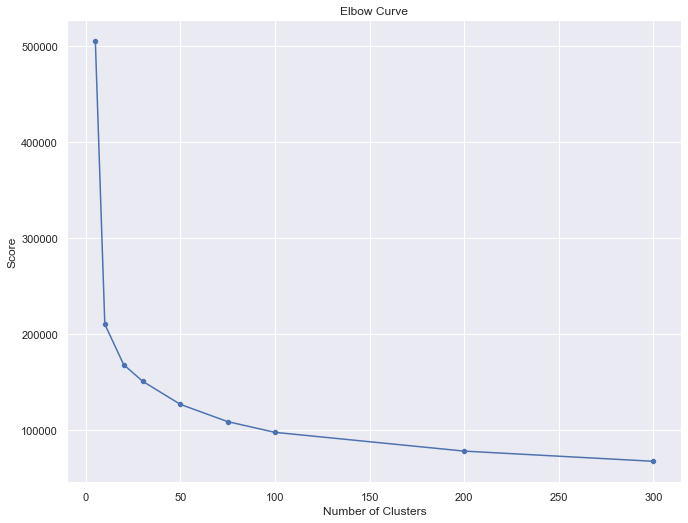

In [13]:
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

A partir del gráfico podemos considerar que tomar 50 clusters es una buena opción.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale



In [15]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(iris)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [17]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = iris.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
)

,sepal_length,sepal_width,petal_length,petal_width,species
PC1,0.444863,-0.233369,0.506043,0.496894,0.494624
PC2,0.381980,0.920972,0.028717,0.070637,-0.009368
PC3,-0.750625,0.287249,-0.028337,0.385446,0.452414
PC4,-0.141201,-0.003513,0.243058,0.612583,-0.738725
PC5,0.269839,-0.121757,-0.826569,0.473583,0.069756


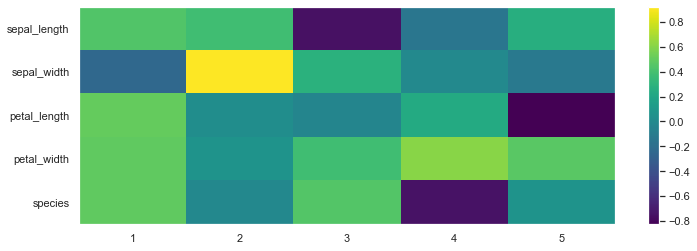

In [18]:
plt.figure(figsize=(12,4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(iris.columns)), iris.columns)
plt.xticks(range(len(iris.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

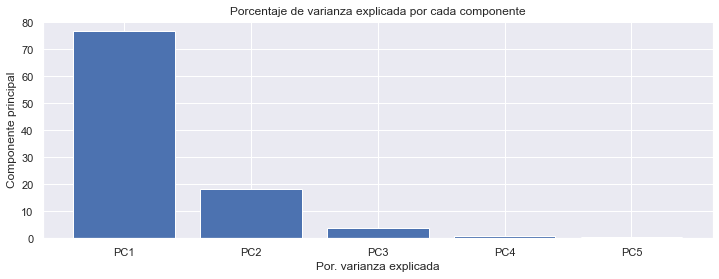

In [19]:
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance, tick_label=['PC1', 'PC2', 'PC3', 'PC4','PC5'])
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

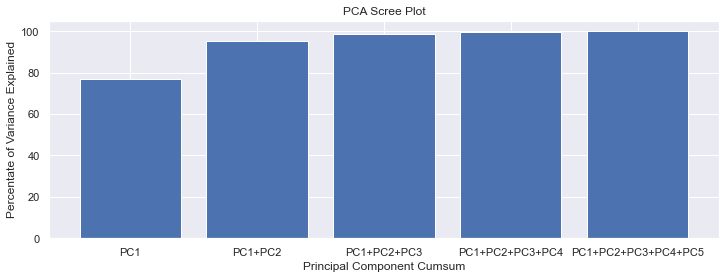

In [20]:
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4', 'PC1+PC2+PC3+PC4+PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [21]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=iris)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5'],
    index   = iris.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.576120,0.474499,-0.054364,-0.103224,0.032274
1,-2.415322,-0.678092,-0.203080,-0.064962,0.107023
2,-2.659333,-0.348282,0.112681,-0.046176,0.032555
3,-2.601991,-0.603306,0.134288,-0.000629,-0.066072
4,-2.683744,0.640220,0.102711,-0.086924,-0.028450


In [22]:
proyecciones = np.dot(modelo_pca.components_, scale(iris).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4','PC5'])
proyecciones = proyecciones.transpose().set_index(iris.index)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.576120,0.474499,-0.054364,-0.103224,0.032274
1,-2.415322,-0.678092,-0.203080,-0.064962,0.107023
2,-2.659333,-0.348282,0.112681,-0.046176,0.032555
3,-2.601991,-0.603306,0.134288,-0.000629,-0.066072
4,-2.683744,0.640220,0.102711,-0.086924,-0.028450


In [23]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(X=proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = iris.columns,
                    index   = iris.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(iris.head())

------------------
Valores originales
------------------


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,-4.440892e-16
1,4.9,3.0,1.4,0.2,-6.661338e-16
2,4.7,3.2,1.3,0.2,-8.881784e-16
3,4.6,3.1,1.5,0.2,-4.440892e-16
4,5.0,3.6,1.4,0.2,-6.661338e-16


---------------------
Valores reconstruidos
---------------------


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['species'] = y


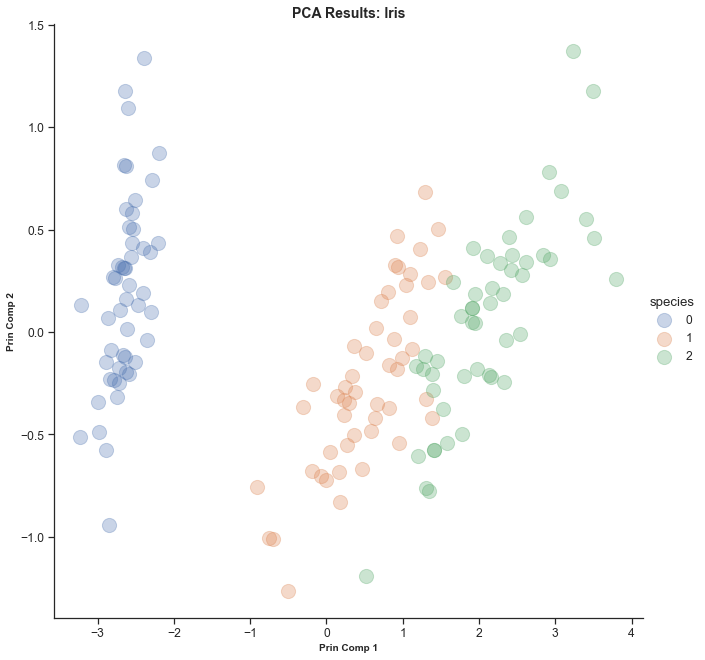

In [25]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Iris', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')


In [26]:
# tsne
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['species'] = y

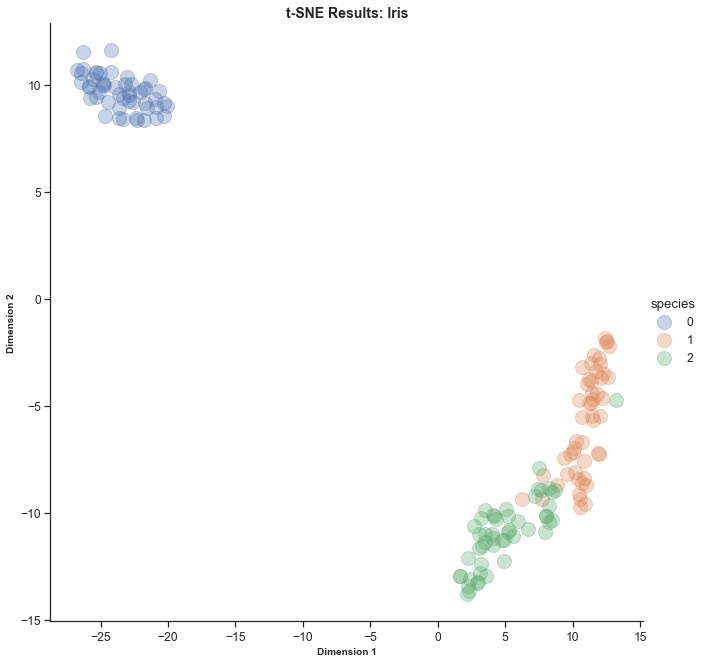

In [27]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Iris', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

A partir de estos gráficos, podemos observar que existe distinción entre las distintas clases para ambos algoritmos, pero para el t-SNE existe una distinción mucho más clara.